In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 5)
plt.style.use("fivethirtyeight")

In [2]:
# lets read the dataset.
Hotel_data = pd.read_csv("E:\Internship - Data Is Good\Task_4\Hospitality minds dataset_Task4.csv")

Hotel_data.shape

(90000, 29)

In [3]:
# lets check the head of the dataset
Hotel_data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [4]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [5]:
# lets check the missing values in the dataset
Hotel_data.isnull().sum().sort_values(ascending = False)

Country                371
Children                 2
Type of Hotel            0
Prev Cancel              0
Cancellation             0
Reservation Status       0
Physical Challenged      0
Parking at premises      0
Per Day Charges          0
Customer                 0
Waiting List             0
Booking Changes          0
Assigned Room            0
Reserved Room            0
History                  0
Booking Type             0
Repeated Guest           0
Year                     0
Kids                     0
Adults                   0
Booking Payment          0
Meal                     0
Weekday Stays            0
Weekend Stays            0
Arrival Date             0
Arrival week             0
Reservation Date         0
Month                    0
Booking Done             0
dtype: int64

In [6]:
Hotel_data["Country"].fillna("XYZ", inplace=True)
Hotel_data["Children"].fillna(0 , inplace=True)

In [7]:
# Checking if all null values are removed

Hotel_data.isnull().sum().sort_values(ascending = False)

Type of Hotel          0
Repeated Guest         0
Cancellation           0
Reservation Status     0
Physical Challenged    0
Parking at premises    0
Per Day Charges        0
Customer               0
Waiting List           0
Booking Changes        0
Assigned Room          0
Reserved Room          0
History                0
Prev Cancel            0
Booking Type           0
Year                   0
Country                0
Kids                   0
Children               0
Adults                 0
Booking Payment        0
Meal                   0
Weekday Stays          0
Weekend Stays          0
Arrival Date           0
Arrival week           0
Reservation Date       0
Month                  0
Booking Done           0
dtype: int64

In [8]:
Hotel_data["Children"] = Hotel_data["Children"].astype("int64")

Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             90000 non-null  int64  
 12  Kids                 90000 non-null  int64  
 13  Country              90000 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [9]:
# Adding Coloumns

Hotel_data["Total_Guests"] = Hotel_data["Adults"] + Hotel_data["Children"]

Hotel_data["Total_stay"] = Hotel_data["Weekend Stays"] + Hotel_data["Weekday Stays"]

Hotel_data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done,Total_Guests,Total_stay
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,0,Contract,132.0,0,2,Check-Out,0,44,2,5
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,0,Transient,150.0,1,1,Check-Out,0,27,2,5
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,0,Transient-Party,44.0,0,1,Check-Out,0,180,1,2
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,0,Transient,151.0,0,4,Check-Out,0,59,3,2
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,0,Transient-Party,115.0,0,1,Check-Out,0,313,2,2


In [10]:
df_new = Hotel_data.copy()[["Parking at premises","Booking Done", "Booking Changes", "Per Day Charges", "Total_Guests", 
                            "Prev Cancel", "History", "Waiting List", "Cancellation" ]]
df_new.head()

,Parking at premises,Booking Done,Booking Changes,Per Day Charges,Total_Guests,Prev Cancel,History,Waiting List,Cancellation
0,0,44,0,132.0,2,0,0,0,0
1,1,27,1,150.0,2,0,0,0,0
2,0,180,0,44.0,1,0,0,0,0
3,0,59,0,151.0,3,0,0,0,0
4,0,313,0,115.0,2,0,0,0,0


In [11]:
# lets form dependent and independent sets

x = df_new.drop(["Cancellation"], axis = 1) 
y = df_new["Cancellation"] 

print(y.shape)
print(x.columns)

(90000,)
Index(['Parking at premises', 'Booking Done', 'Booking Changes',
       'Per Day Charges', 'Total_Guests', 'Prev Cancel', 'History',
       'Waiting List'],
      dtype='object')


In [12]:
# Separate dataset into train and test.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 46)

In [13]:
# perform standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**1. Implementing Logistic Regression**

In [14]:
# Importing logistic regression.

from sklearn.linear_model import LogisticRegression

In [15]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

predict_model1 = model1.predict(x_test)

In [16]:
# lets check the Model accuracy

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, predict_model1)

rmse = np.sqrt(mse)

r2_score = r2_score(y_test, predict_model1)

print("RMSE Score :", rmse*100)

print("R2 Score :",r2_score*100)

RMSE Score : 54.883715455699814
R2 Score : -29.081039180928215


In [17]:
model1.score(x_test, y_test)*100

69.87777777777778

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, predict_model1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79     11322
           1       0.67      0.37      0.48      6678

    accuracy                           0.70     18000
   macro avg       0.69      0.63      0.63     18000
weighted avg       0.69      0.70      0.67     18000



In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict_model1)

array([[10109,  1213],
       [ 4209,  2469]], dtype=int64)

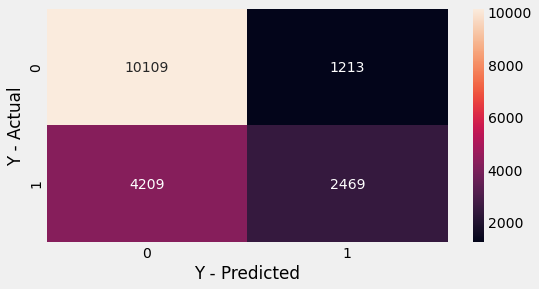

In [21]:
plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, predict_model1), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

In [22]:
from sklearn.metrics import roc_curve , auc

auc for our classifier is :0.747393018249474


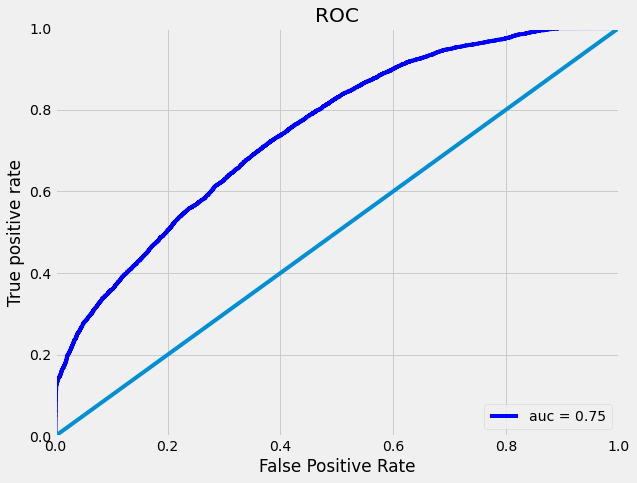

In [23]:
class_probab= model1.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()

**2. Implementing Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
classifier_model2 = DecisionTreeClassifier(max_depth = 10, max_features = None, min_samples_leaf = 15, random_state  = 101)
classifier_model2.fit(x_train, y_train)

predict_model2 = classifier_model2.predict(x_test)

In [26]:
classifier_model2.score(x_test, y_test)*100

70.93333333333334

In [27]:
print(classification_report(y_test, predict_model2))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80     11322
           1       0.75      0.32      0.45      6678

    accuracy                           0.71     18000
   macro avg       0.73      0.63      0.63     18000
weighted avg       0.72      0.71      0.67     18000



In [28]:
confusion_matrix(y_test, predict_model2)

array([[10601,   721],
       [ 4511,  2167]], dtype=int64)

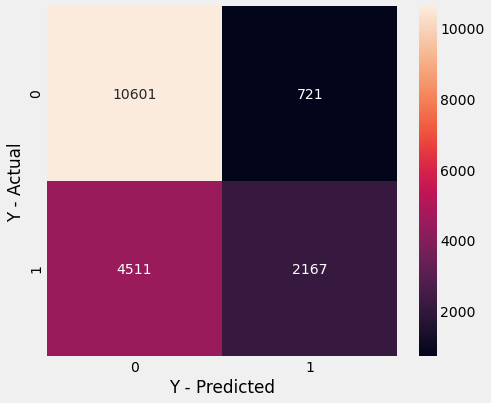

In [29]:
plt.figure(figsize = (7,6))
sns.heatmap(confusion_matrix(y_test, predict_model2), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

auc for our classifier is :0.7693231456180032


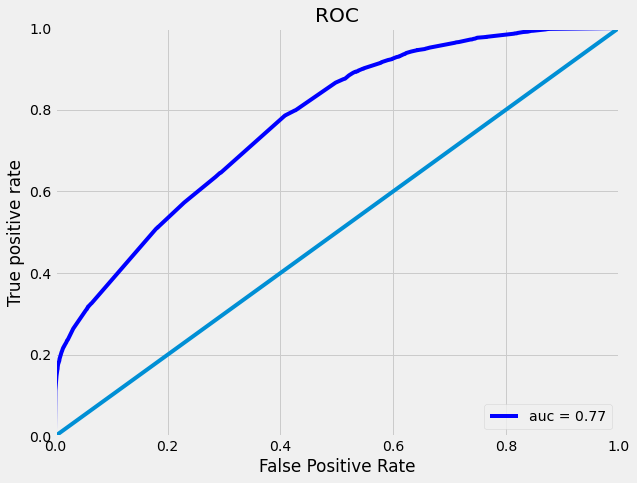

In [30]:
class_probab= classifier_model2.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()

**3. Implementing Randomforest Classifier**

In [31]:
# Importing RandomForest Classifier.

from sklearn.ensemble import RandomForestClassifier

In [32]:
classifier_model3 = RandomForestClassifier(n_estimators=100, max_depth=10 , random_state  = 5)
classifier_model3.fit(x_train , y_train)

predict_model3 = classifier_model3.predict(x_test)

In [33]:
classifier_model3.score(x_test, y_test)*100

70.77222222222223

In [34]:
print(classification_report(y_test, predict_model3))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80     11322
           1       0.77      0.30      0.43      6678

    accuracy                           0.71     18000
   macro avg       0.74      0.62      0.62     18000
weighted avg       0.73      0.71      0.67     18000



In [35]:
confusion_matrix(y_test, predict_model3)

array([[10735,   587],
       [ 4674,  2004]], dtype=int64)

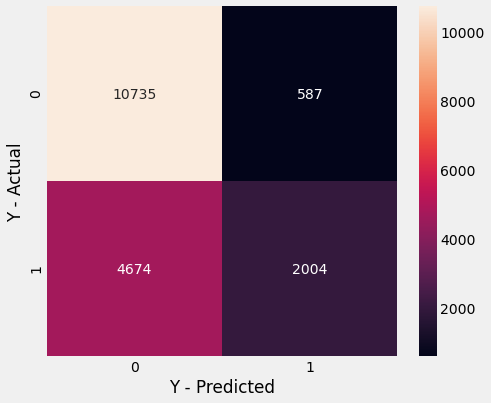

In [36]:
plt.subplots(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predict_model3), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

auc for our classifier is :0.7721624232445543


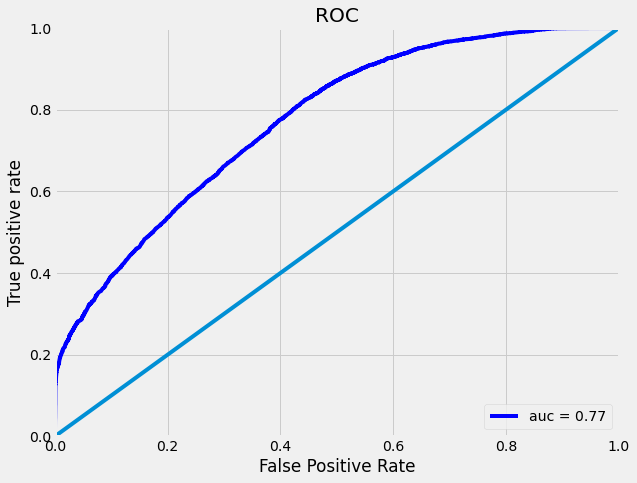

In [37]:
class_probab= classifier_model3.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()

**4. Implementing Naive Bayes Classifier Algorithm**

In [38]:
# Importing Naive Bayes.

from sklearn.naive_bayes import GaussianNB

In [39]:
classifier_model4 = GaussianNB()
classifier_model4.fit(x_train , y_train)

predict_model4 = classifier_model4.predict(x_test)

In [40]:
classifier_model4.score(x_test, y_test)*100

44.605555555555554

In [41]:
print(classification_report(y_test, predict_model4))

              precision    recall  f1-score   support

           0       0.98      0.12      0.22     11322
           1       0.40      0.99      0.57      6678

    accuracy                           0.45     18000
   macro avg       0.69      0.56      0.39     18000
weighted avg       0.76      0.45      0.35     18000



In [42]:
confusion_matrix(y_test, predict_model4)

array([[1385, 9937],
       [  34, 6644]], dtype=int64)

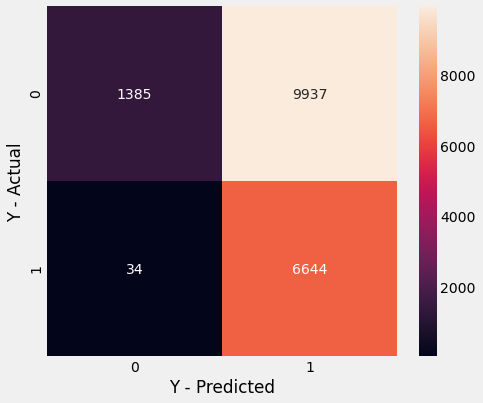

In [43]:
plt.subplots(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predict_model4), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

auc for our classifier is :0.7368067885548462


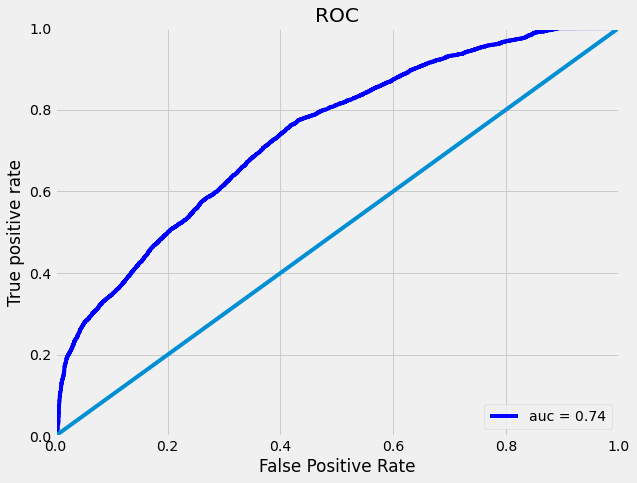

In [44]:
class_probab= classifier_model4.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()

**5. Implementing K Nearest Neighbor Classification Algorithm**

In [45]:
# Importing K Nearest Neighbor.

from sklearn.neighbors import KNeighborsClassifier

In [46]:
classifier_model5 = KNeighborsClassifier(n_neighbors=5)
classifier_model5.fit(x_train, y_train)

predict_model5 = classifier_model5.predict(x_test)

In [47]:
classifier_model5.score(x_test, y_test)*100

68.84444444444443

In [48]:
print(classification_report(y_test, predict_model5))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     11322
           1       0.59      0.52      0.56      6678

    accuracy                           0.69     18000
   macro avg       0.66      0.65      0.66     18000
weighted avg       0.68      0.69      0.68     18000



In [49]:
confusion_matrix(y_test, predict_model5)

array([[8887, 2435],
       [3173, 3505]], dtype=int64)

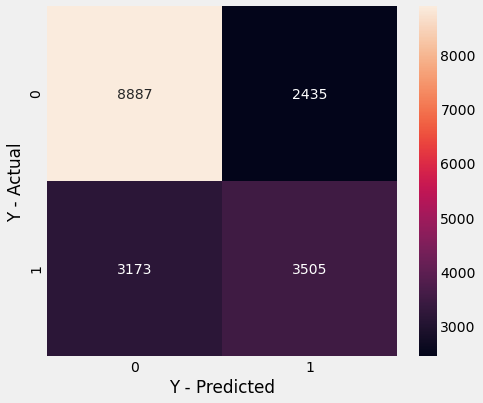

In [50]:
plt.figure(figsize = (7,6))
sns.heatmap(confusion_matrix(y_test, predict_model5), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

auc for our classifier is :0.7307007009652219


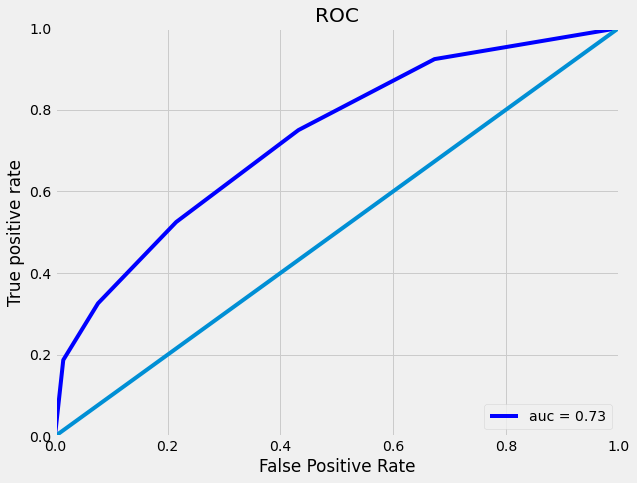

In [51]:
class_probab= classifier_model5.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()

**6. Implementing Stochastic Gradient Descent**

In [52]:
from sklearn.linear_model import SGDClassifier

In [53]:
classifier_model6 = SGDClassifier(loss = "modified_huber", shuffle = True, random_state  = 101)
classifier_model6.fit(x_train, y_train)

predict_model6 = classifier_model6.predict(x_test)

In [54]:
classifier_model6.score(x_test, y_test)*100

69.41111111111111

In [55]:
print(classification_report(y_test, predict_model6))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78     11322
           1       0.63      0.42      0.51      6678

    accuracy                           0.69     18000
   macro avg       0.67      0.64      0.64     18000
weighted avg       0.68      0.69      0.68     18000



In [56]:
confusion_matrix(y_test, predict_model6)

array([[9679, 1643],
       [3863, 2815]], dtype=int64)

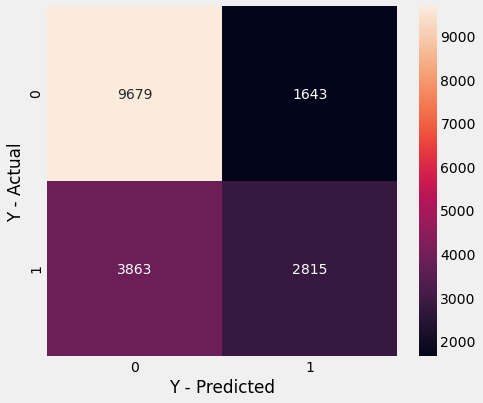

In [57]:
plt.figure(figsize = (7,6))
sns.heatmap(confusion_matrix(y_test, predict_model6), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

auc for our classifier is :0.7425873233309415


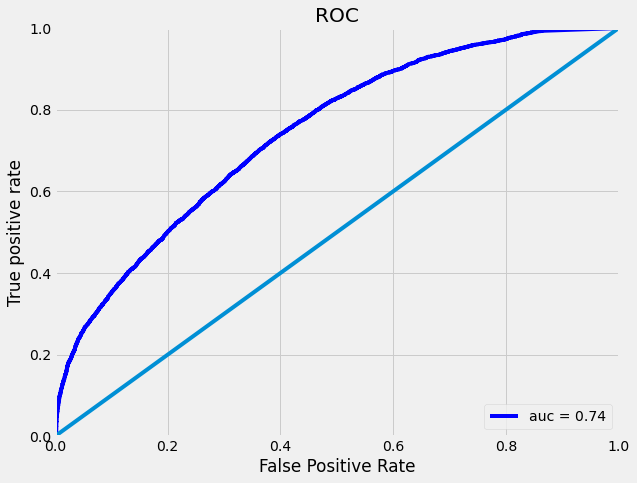

In [58]:
class_probab= classifier_model6.predict_proba(x_test)
preds = class_probab[:, 1]

fpr,tpr,threshold = roc_curve(y_test , preds)

roc_auc = auc(fpr, tpr)

print(f"auc for our classifier is :{roc_auc}")

# plotting roc
plt.figure(figsize = (9,7))
plt.title("ROC")
plt.plot(fpr,tpr, 'b',label = 'auc = %0.2f' % roc_auc )

plt.legend(loc = 'lower right')
plt.plot([0,1] , [0,1])

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel('False Positive Rate')
plt.show()